# IBM HR Employee Attrition
#### @ Author - Mohammed
**** [Website](https://datascience52.wordpress.com/) | [Github](https://github.com/mmd52) | [LinkedIn](https://www.linkedin.com/in/mohammedtopiwalla) ****

### Feature Selection

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.options.display.max_rows=10
pd.options.display.max_columns=50
import numpy as np
from sklearn import tree
from sklearn import cross_validation
import sklearn 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\moham\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df=pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [51]:
data_n=df[['Age','DailyRate','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','NumCompaniesWorked']]

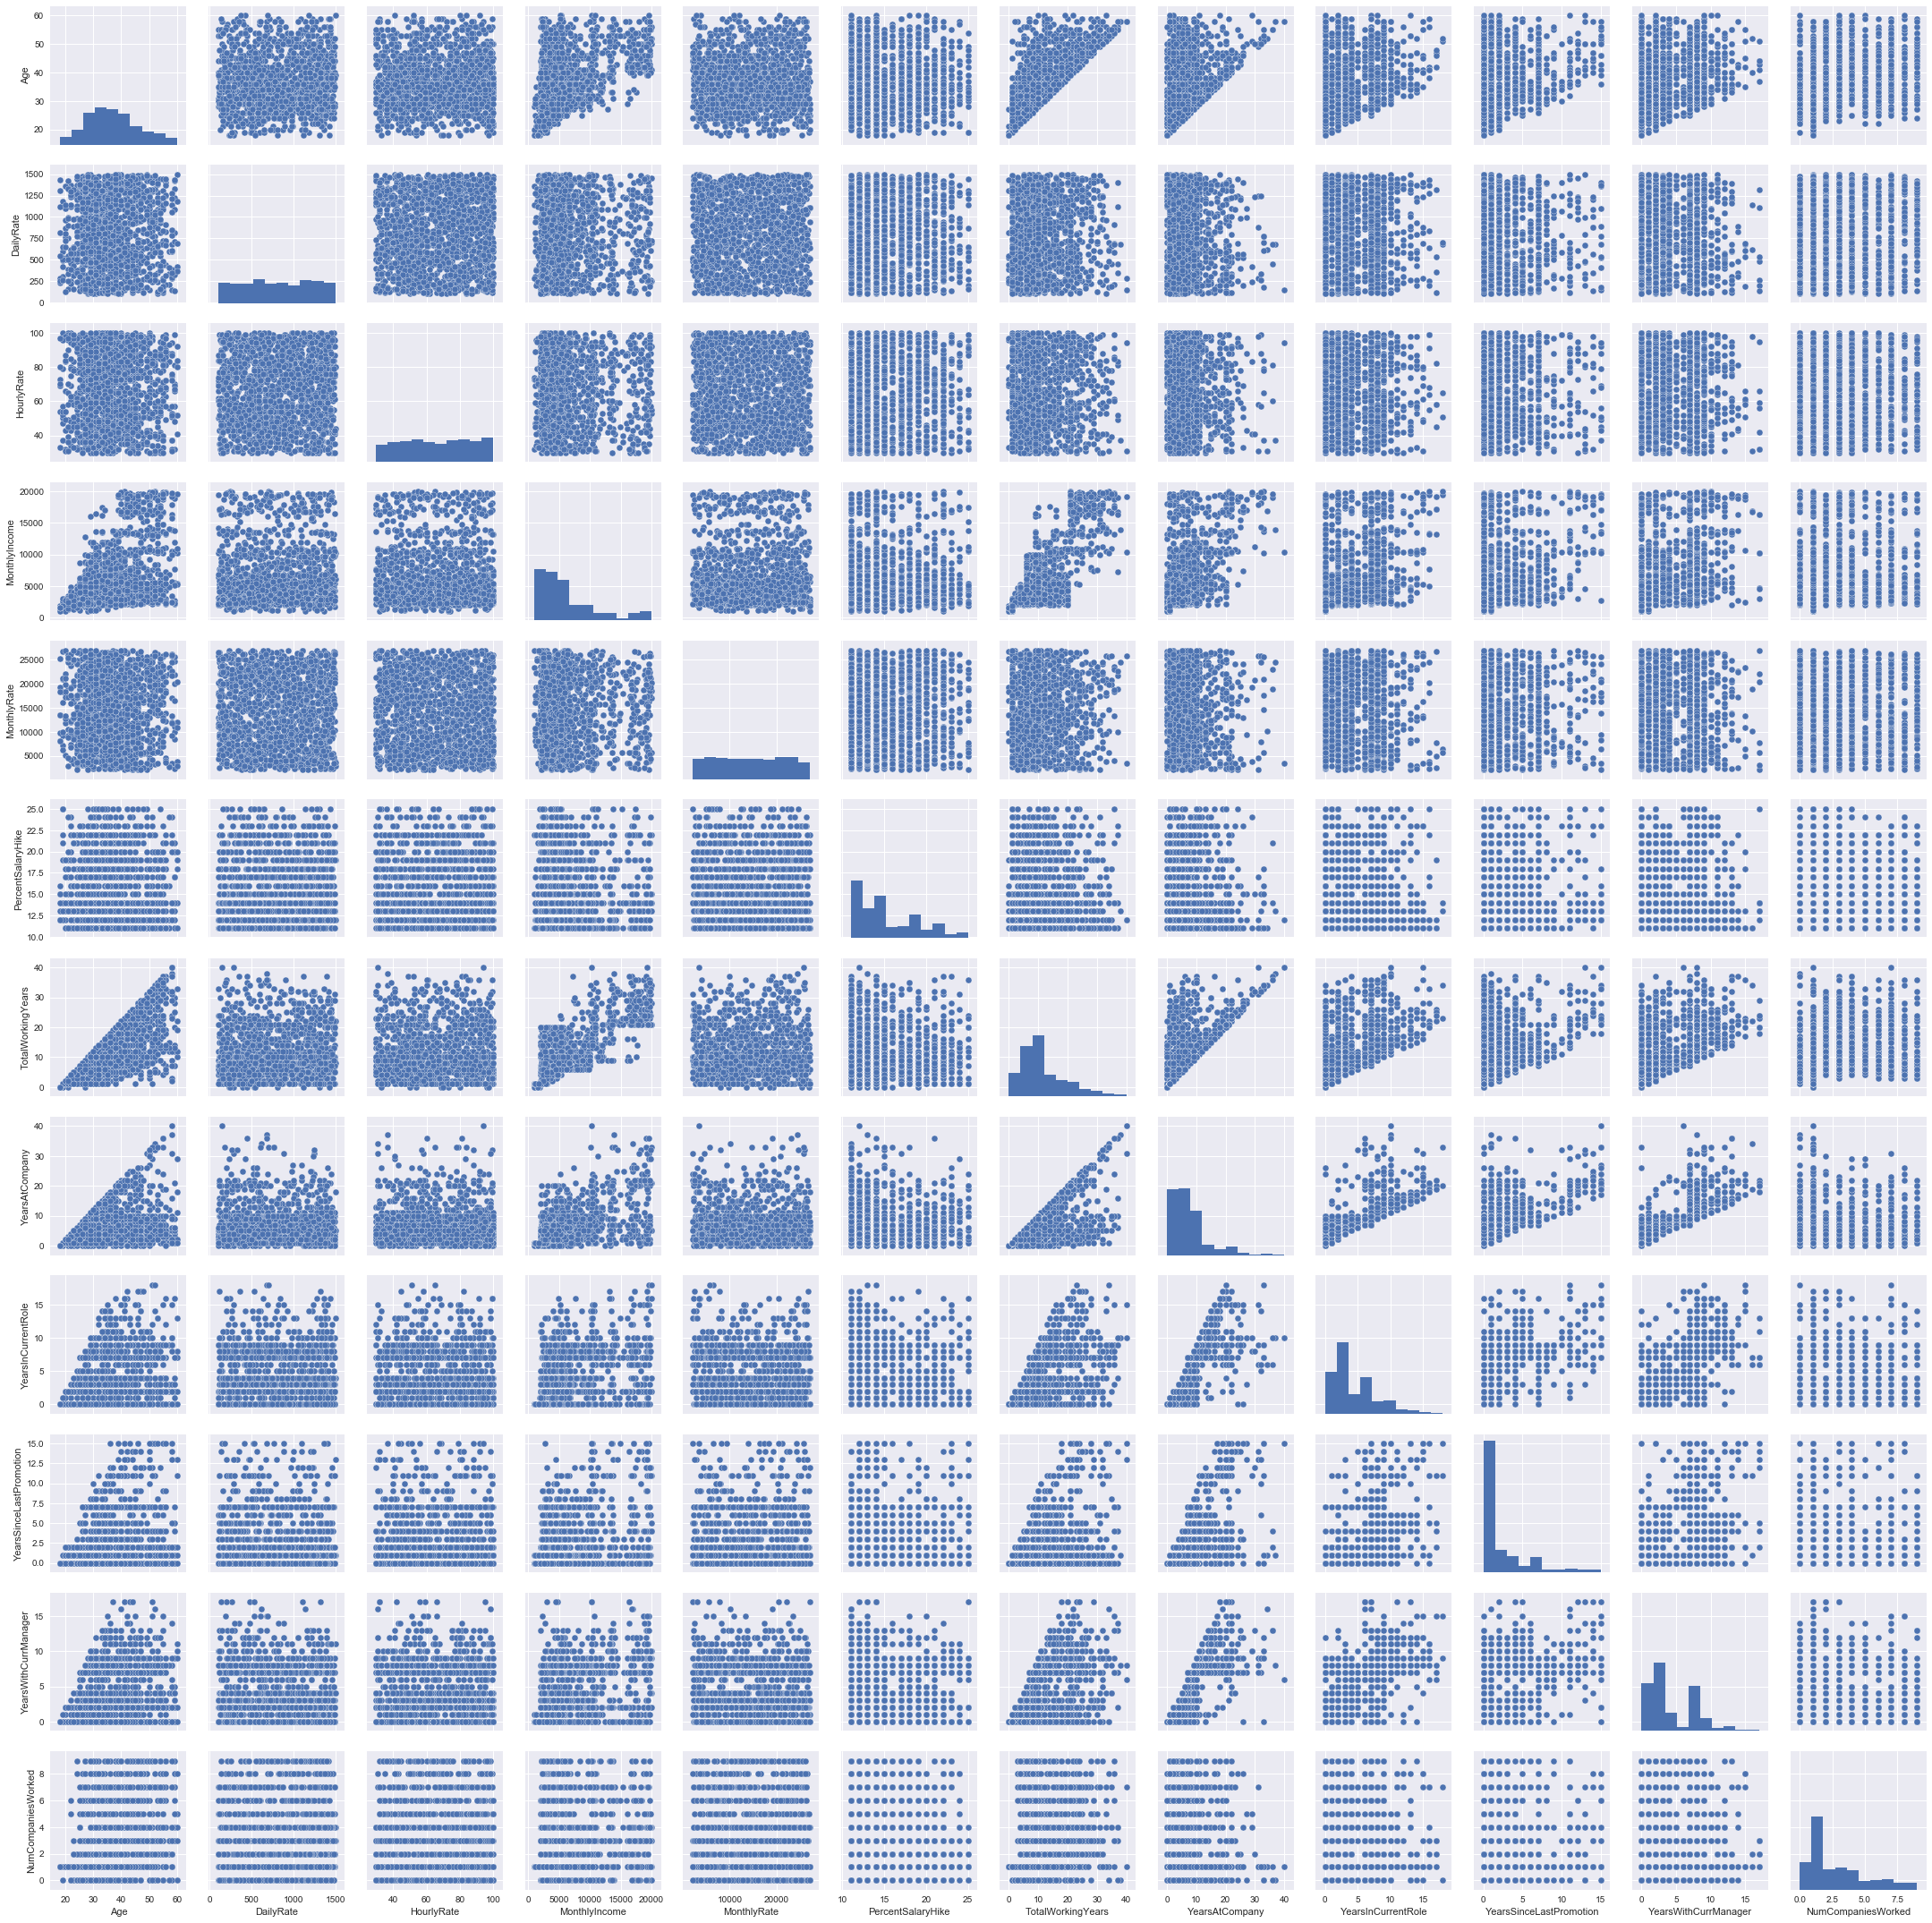

In [52]:
sns.pairplot(data_n)

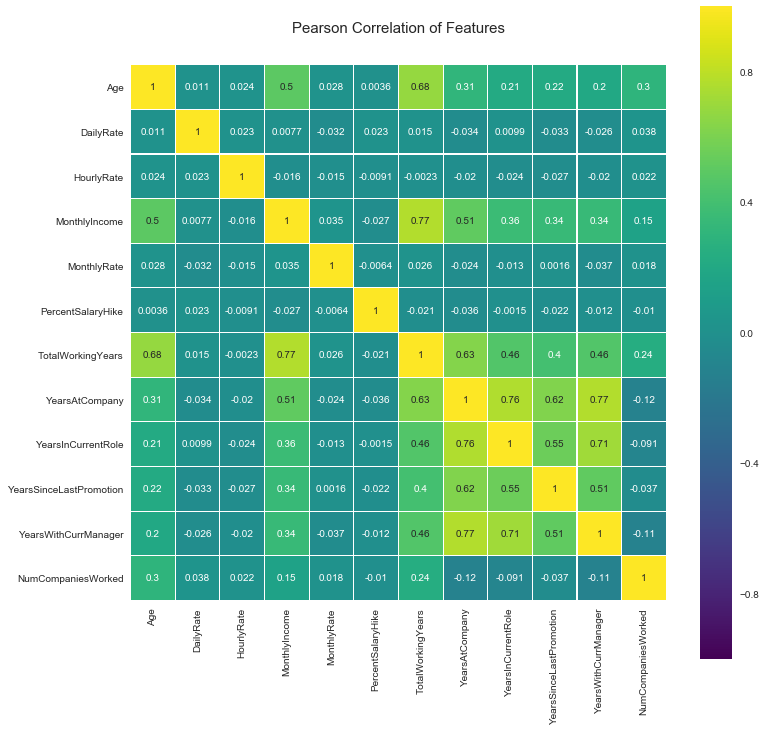

In [54]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data_n.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [5]:
df = pd.read_csv("MainEncodedData.csv")
del df['Unnamed: 0']
y=df['Attrition']
x=df.drop(df.columns[1], axis = 1)

In [6]:
r_state=52
avg_scores = []
parameter_values = np.arange(0,1, 0.01)
for mid in parameter_values:
    estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = r_state
                                            , min_impurity_decrease = mid
                                            )
    scores = cross_val_score(estimator, x, y, scoring='accuracy', cv = 10)
    avg_scores.append(np.mean(scores))

In [7]:
mid_opt = np.argmax(avg_scores)
print("The optimal value of 'min_impurity_decrease' is {0:.2f}".format(parameter_values[mid_opt])+
      " giving accuracy {0:.2f}".format(avg_scores[mid_opt]))

The optimal value of 'min_impurity_decrease' is 0.02 giving accuracy 0.84


In [16]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = r_state
                                       , min_impurity_decrease = 0.007
                                       )
model=estimator.fit(x,y)
y_pred = estimator.predict(x)
accuracy_full = np.mean(y == y_pred) * 100
print("The accuracy on full training set is {0:.1f}%".format(accuracy_full))

The accuracy on full training set is 85.3%


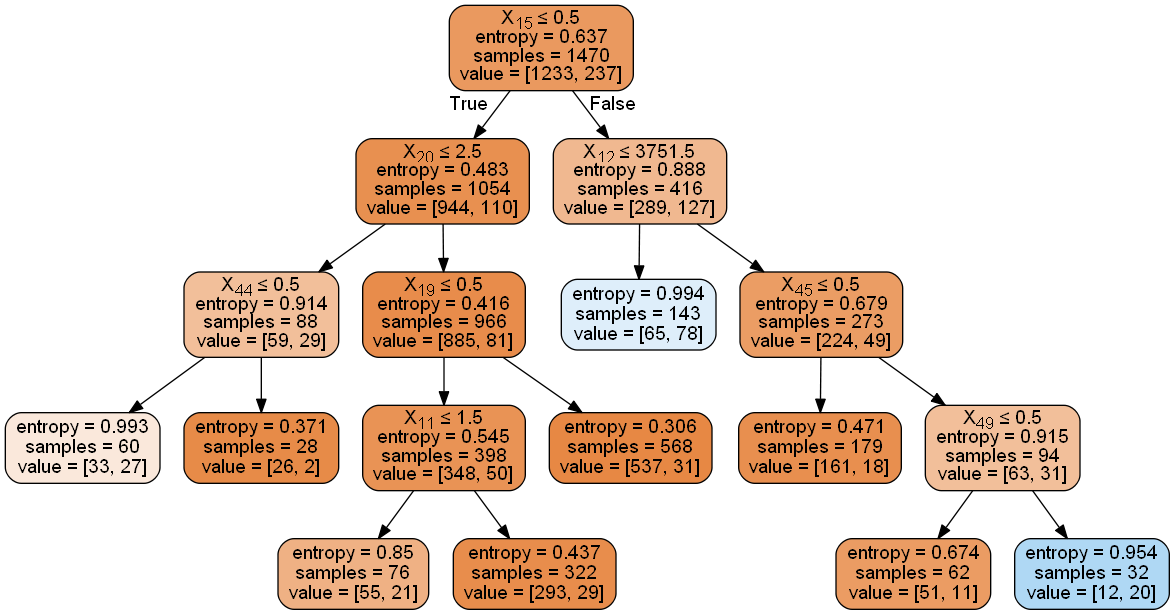

In [17]:
%matplotlib inline
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [7]:
import pandas as pd
from sklearn import svm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
% matplotlib inline

In [8]:
# load data
df = pd.read_csv("MainEncodedData.csv")
del df['Unnamed: 0']
y=df['Attrition']
x=df.drop(df.columns[1], axis = 1)

# Feature Extraction with RFE
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(x, y)
print("Num Features: "+str(fit.n_features_))
print("Selected Features: "+str(fit.support_))
print("Feature Ranking: "+str(fit.ranking_))

Num Features: 3
Selected Features: [False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False  True False
 False False]
Feature Ranking: [41  9 45 36 43 19 47 13 44 10 34 14 46 48 31  1 38 37 22 20 32 23 17 33
 28 29 30 35 40 18  6 25 12 24 21  8 26 16  3 11  7  2  4  1 42 27  1 15
 39  5]


57
['age', 'businesstravel', 'dailyrate', 'degree', 'department_human', 'department_research', 'department_sales', 'development', 'director', 'distancefromhome', 'education', 'educationfield_human', 'educationfield_life', 'educationfield_marketing', 'educationfield_medical', 'educationfield_other', 'educationfield_technical', 'employeecount', 'employeenumber', 'environmentsatisfaction', 'executive', 'gender_female', 'gender_male', 'hourlyrate', 'jobinvolvement', 'joblevel', 'jobrole_healthcare', 'jobrole_human', 'jobrole_laboratory', 'jobrole_manager', 'jobrole_manufacturing', 'jobrole_research', 'jobrole_sales', 'jobsatisfaction', 'maritalstatus_divorced', 'maritalstatus_married', 'maritalstatus_single', 'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime', 'percentsalaryhike', 'performancerating', 'relationshipsatisfaction', 'representative', 'resources', 'sciences', 'scientist', 'stockoptionlevel', 'technician', 'totalworkingyears', 'trainingtimeslastyear', 'worklifebala

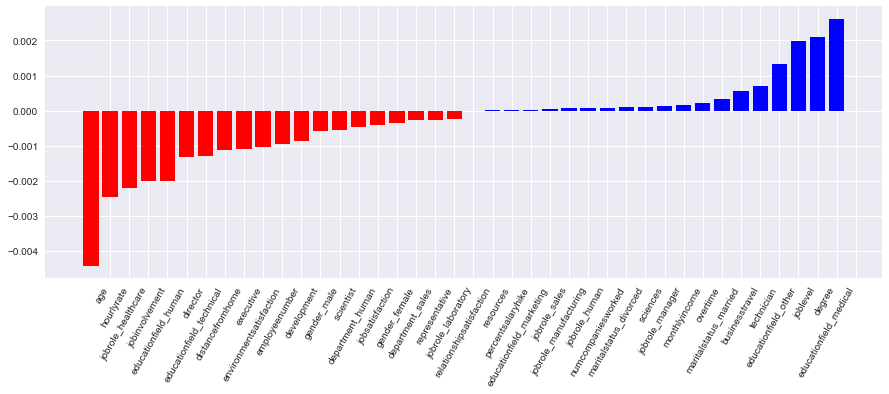

In [9]:
def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()
cv = CountVectorizer()
cv.fit(x)
print (len(cv.vocabulary_))
print (cv.get_feature_names())
svm = LinearSVC()
svm.fit(x, y)
plot_coefficients(svm, cv.get_feature_names())
